In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = fetch_openml(data_id=506, as_frame = True)
print(data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

analcatdata    A collection of data sets used in the book "Analyzing Categorical Data,"
by Jeffrey S. Simonoff, Springer-Verlag, New York, 2003. The submission
consists of a zip file containing two versions of each of 84 data sets,
plus this README file. Each data set is given in comma-delimited ASCII
(.csv) form, and Microsoft Excel (.xls) form.

NOTICE: These data sets may be used freely for scientific, educational and/or
noncommercial purposes, provided suitable acknowledgment is given (by citing
the above-named reference).

Further details concerning the book, including information on statistical software
(including sample S-PLUS/R and SAS code), are available at the web site

http://www.stern.nyu.edu/~jsimonof/AnalCatData


Information about the dataset
CLASSTYPE: numeric
CLASSINDEX: last


Note: Quotes, Single-Quotes and Backslashes were removed, Blanks replaced
with Underscores

Downloaded from openml.org.


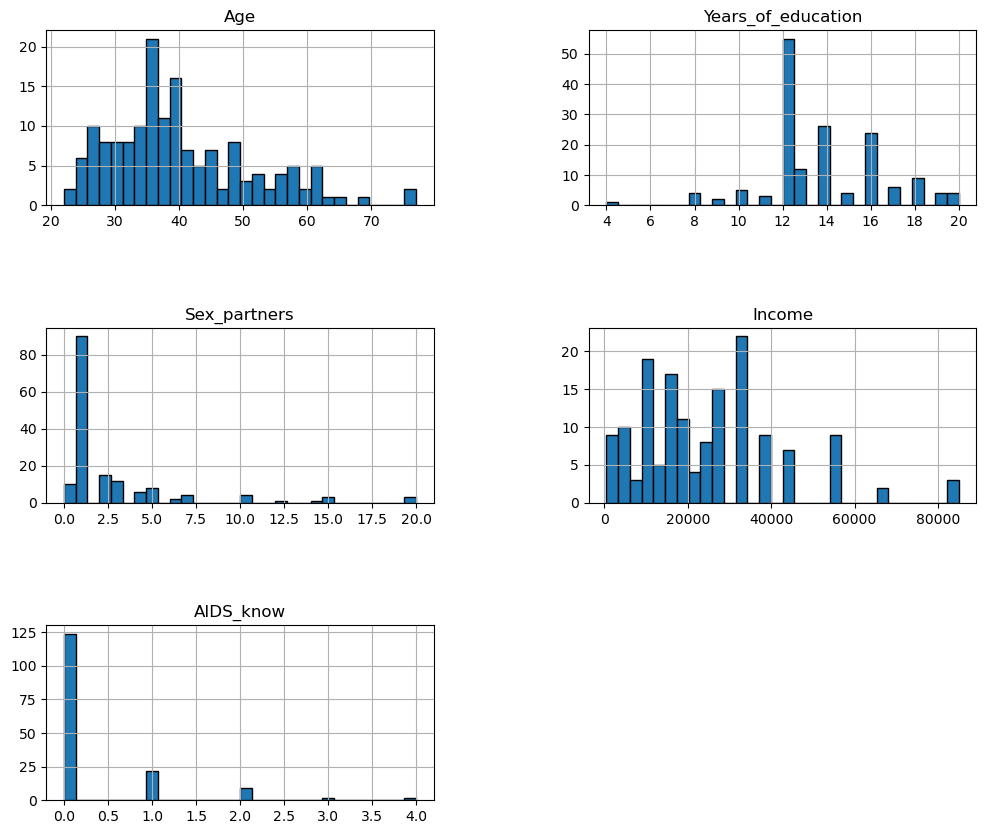

In [5]:
data.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
#plt.subplots(3,3)[1].set_xlim(0, 10)

We can first focus on features for which their distributions would be more or less expected.

The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

Regarding the average house age, the distribution is more or less uniform.

The target distribution has a long tail as well. In addition, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5.

Focusing on the average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values. It means that there are very high and few values (maybe they could be considered as outliers?). We can see this specificity looking at the statistics for these features:

In [ ]:
data

SyntaxError: invalid syntax (3881568440.py, line 1)

In [13]:
# Convert to DataFrame for easier exploration
df = pd.DataFrame(data, columns=data[[:]])
#The target variable is the median house value for California districts,
#expressed in hundreds of thousands of dollars ($100,000)
df['medv'] = data.target
print(df)

AttributeError: 'DataFrame' object has no attribute 'target'

In [26]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
data.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


All these features have large outliers. 

Guess hotels and motels with large number of bedrooms wrt the remaining 75%, large number of rooms may be due to vacation resorts or very large and rare households (something like a castle or a gigantic mansion in the hills maybe).

Large avr occupation can be also attributed to hotels or vacation resorts.

In [6]:
# Split into features (X), everything except the target 
X = df.drop('Target', axis=1)

#or some specific feature
#X = df[['MedInc']]

#and target (y)
y = df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5558915986952442
R-squared: 0.575787706032451


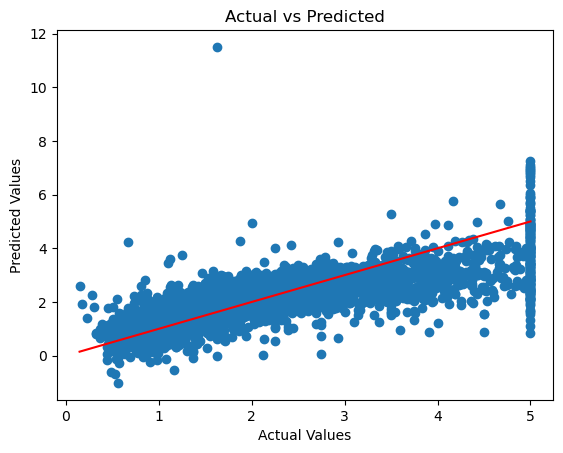

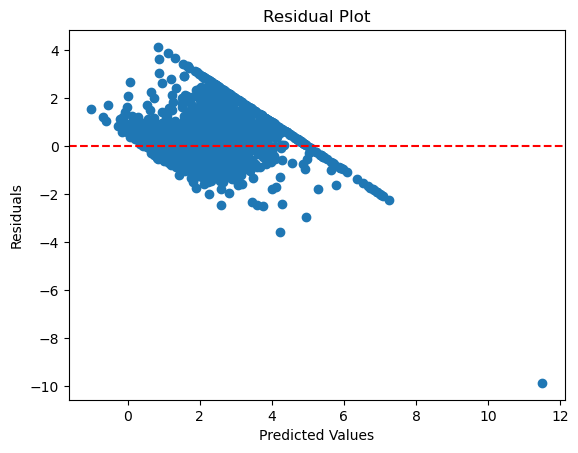

In [9]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [8]:
# Access the model's coefficients, interesting to gauge the relation between features and target
coefficients = model.coef_

# Display the coefficients
#print("Coefficients:", coefficients)

# Optionally, map the coefficients back to the feature names
feature_names = X_train.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: MedInc, Coefficient: 0.8543830309268547
Feature: HouseAge, Coefficient: 0.12254623807840709
Feature: AveRooms, Coefficient: -0.29441013447329933
Feature: AveBedrms, Coefficient: 0.3392594905944842
Feature: Population, Coefficient: -0.0023077231458302175
Feature: AveOccup, Coefficient: -0.04082910308508779
Feature: Latitude, Coefficient: -0.8969288766386654
Feature: Longitude, Coefficient: -0.8698417752417179


The main positive contributor to the house value is the median income of the bloc (reasonable, the more you earn the more you can spend into real estate). 

Another significant contributor is the avr number of bedrooms but not the number of rooms, I would have expected the larger the house the larger the price, maybe in some of the most expansive areas like San Francisco Bay due to crammed spaces pricey houses have fewer rooms dragging the price down.

House age in the bloc also seems to play a role, middle aged people working well paid jobs tend to have pricer houses but maybe less children?

Position also plays a crucial role, the closer the house is to large metro areas like San Francisco, Los Angeles and San Diego, the larger the price.

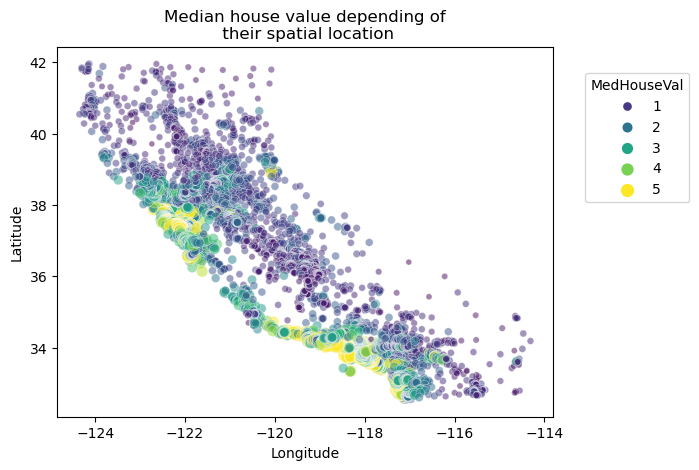

In [21]:
import seaborn as sns

sns.scatterplot(
    data=data.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")